In [1]:
# Set up code checking
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

print('Complete')

Complete


In [2]:
# Path of the file to read
sb_data = pd.read_csv("/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv")
sb_data.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [3]:
# Count number & data type
sb_data.count()

Id                        113
gender                    113
age                       113
status                    113
income                    113
visitNo                   113
method                    113
timeSpend                 113
location                  113
membershipCard            113
itemPurchaseCoffee        113
itempurchaseCold          113
itemPurchasePastries      113
itemPurchaseJuices        113
itemPurchaseSandwiches    113
itemPurchaseOthers        113
spendPurchase             113
productRate               113
priceRate                 113
promoRate                 113
ambianceRate              113
wifiRate                  113
serviceRate               113
chooseRate                113
promoMethodApp            113
promoMethodSoc            113
promoMethodEmail          113
promoMethodDeal           113
promoMethodFriend         113
promoMethodDisplay        113
promoMethodBillboard      113
promoMethodOthers         113
loyal                     113
dtype: int

<AxesSubplot:xlabel='income', ylabel='Count'>

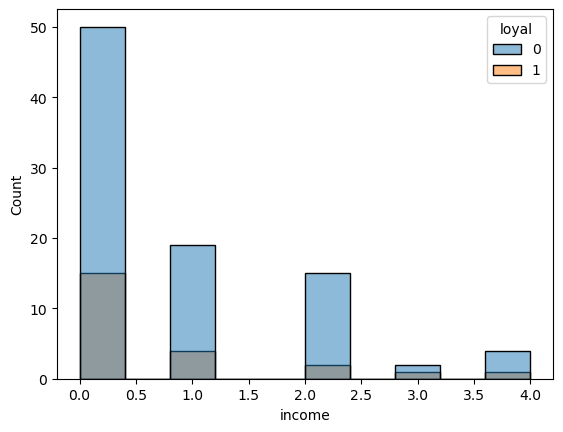

In [4]:
#Histogram shoing comparison between income and loyal customer
sns.histplot(data=sb_data, x='income', hue='loyal')

<AxesSubplot:xlabel='visitNo', ylabel='Count'>

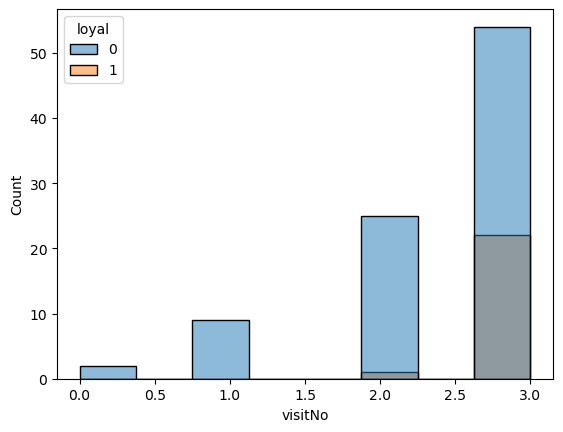

In [5]:
#Histogram shoing comparison between visit rate and loyal customer
sns.histplot(data=sb_data, x='visitNo', hue='loyal')

<AxesSubplot:xlabel='location', ylabel='Count'>

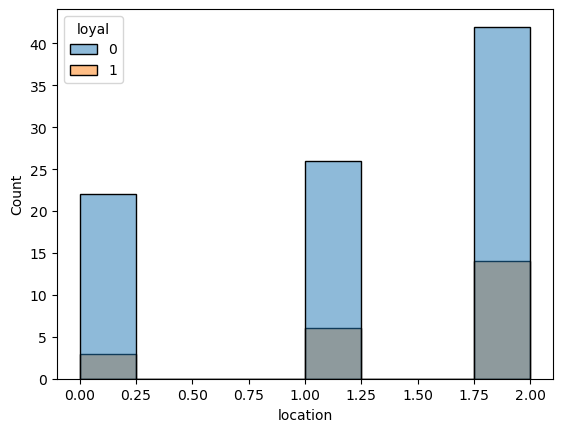

In [6]:
#Histogram shoing comparison between location and loyal customer
sns.histplot(data=sb_data, x='location', hue='loyal')

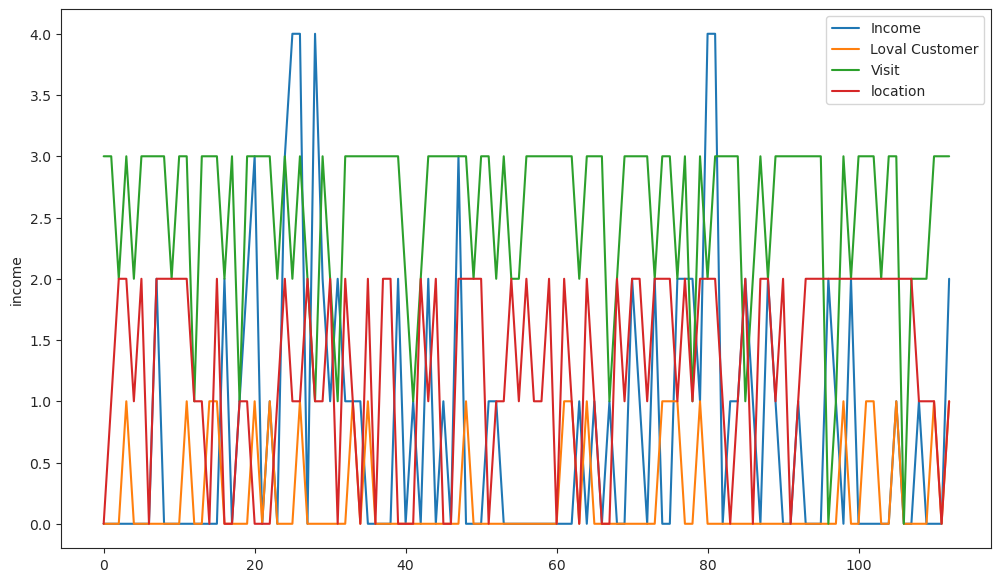

In [7]:
# Change the style of the figure
sns.set_style("ticks")

# Line chart
plt.figure(figsize=(12,7))
sns.lineplot(x=sb_data.index, y=sb_data['income'], label='Income')
sns.lineplot(x=sb_data.index, y=sb_data['loyal'], label='Loval Customer')
sns.lineplot(x=sb_data.index, y=sb_data['visitNo'], label='Visit')
sns.lineplot(x=sb_data.index, y=sb_data['location'], label='location')
plt.legend()

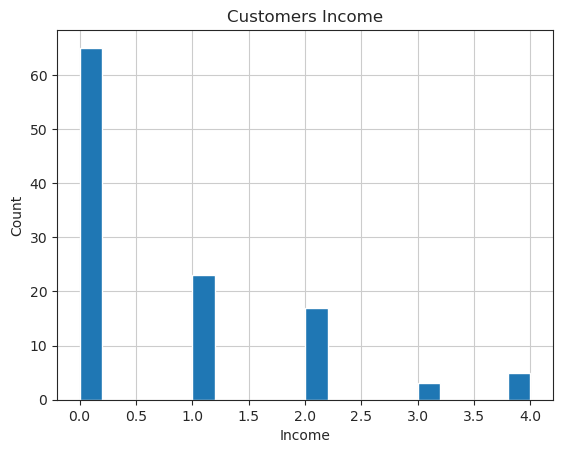

In [8]:
# Bar chart showing income count in data frame
sb_data['income'].hist(bins=20);
plt.title('Customers Income');
plt.xlabel('Income');
plt.ylabel('Count');

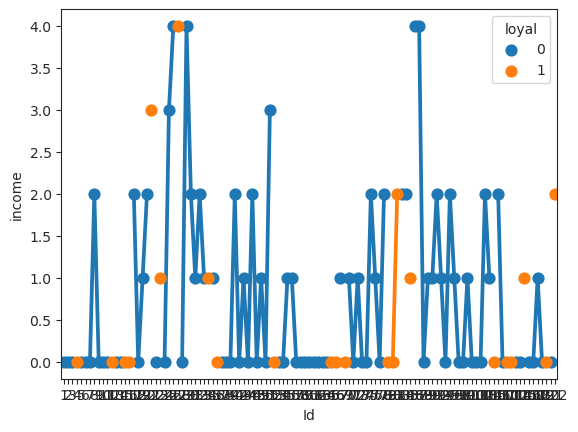

In [9]:
# Scatter plot showing the relationship between income and loyal customer
sns.pointplot(data=sb_data, x='Id', y='income', hue='loyal');

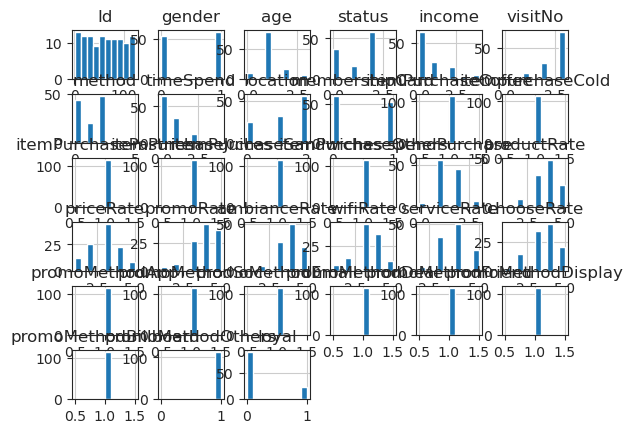

In [10]:
# Histogram of the data contained in the data frame
sb_data.hist();

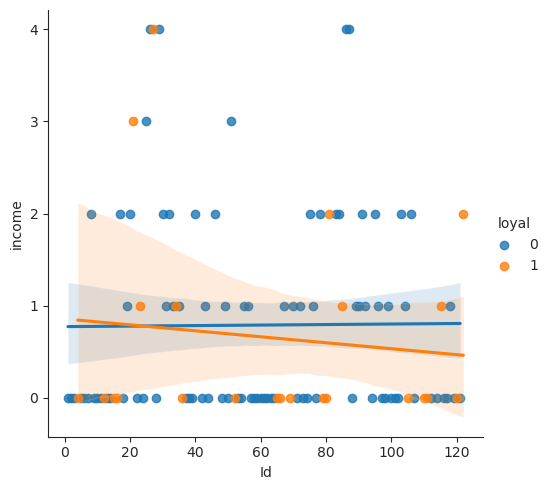

In [11]:
# Color-coded scatter plot w/ regression lines showing the relationship between income and loyal customer
sns.lmplot(x="Id", y="income", hue="loyal", data=sb_data)

<AxesSubplot:xlabel='loyal', ylabel='location'>

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


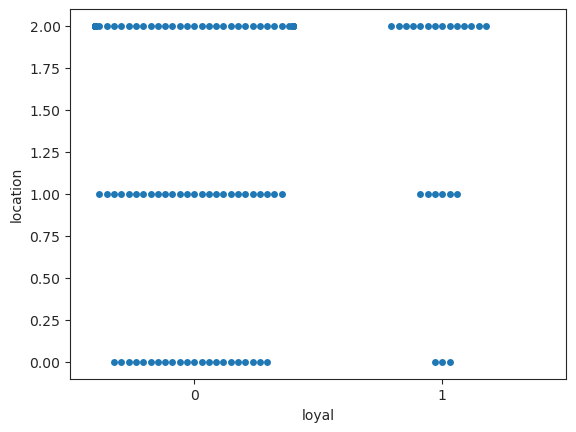

In [12]:
# Scatter plot showing the relationship between location and loyal customer
sns.swarmplot(x=sb_data['loyal'],
              y=sb_data['location'])

<AxesSubplot:xlabel='loyal', ylabel='visitNo'>

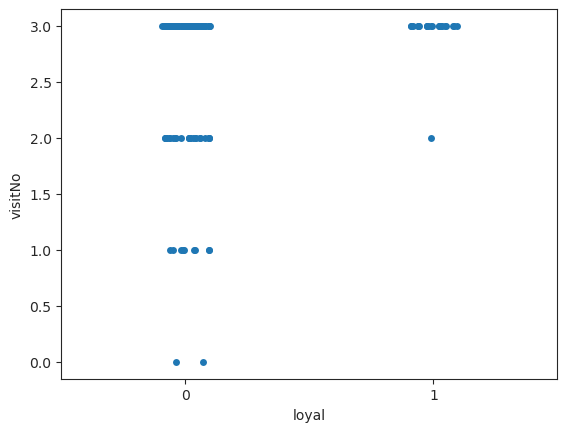

In [13]:
# Scatter plot showing the relationship between visit rate and loyal customer
sns.stripplot(x=sb_data['loyal'], y=sb_data['visitNo'])

In [14]:
# MODEL VALIDATION

# Path of the file to read
sb_data = '/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv'

sb_df = pd.read_csv(sb_data)
y = sb_df.loyal
feature_columns = ['income', 'visitNo', 'location', 'Id']
X = sb_df[feature_columns]

# Specify Model
sb_model = DecisionTreeRegressor()
# Fit Model
sb_model.fit(X, y)

print("First in-sample predictions:", sb_model.predict(X.head()))
print("Actual target values :", y.head().tolist())

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex4 import *
print("Complete")

First in-sample predictions: [0. 0. 0. 1. 0.]
Actual target values : [0, 0, 0, 1, 0]
Complete


In [15]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

print('Complete')

Complete


In [16]:
# Specify the model
sb_model = DecisionTreeRegressor(random_state=1)

# Fit sb_model with the training data.
sb_model.fit(train_X, train_y)

print('Complete')

Complete


In [17]:
# Predict with all validation observations
val_predictions = sb_model.predict(val_X)
print(val_predictions)

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0.]


In [18]:
#train_X, val_X, train_y, val_y
# print the top few validation predictions
val_predictions = sb_model.predict(val_X)
print(val_predictions)

# print the top few actual value from validation data
print(sb_model.predict(X.head()))

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0.]


In [19]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)

0.27586206896551724


In [20]:
# XGBOOST

# Read the data
X = pd.read_csv('/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv', 
                index_col='income')
X_test_full = pd.read_csv('/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv',
                          index_col='income')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['loyal'], inplace=True)
y = X.loyal              
X.drop(['loyal'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

print('Complete')

Complete


In [21]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor()

# Fit the model
my_model_1.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

predictions_1 = my_model_1.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions_1, y_valid)))

Mean Absolute Error: 0.19978093560380134


In [22]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 0.20141727022026948


In [23]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=2000, learning_rate=0.5)

# Fit the model
my_model_3.fit(X_train, y_train)

# Get predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

Mean Absolute Error: 0.20697044529420647


Text(0.5, 1.0, 'XGBoost Model\nRMSE: 0.39, R^2: 0.24')

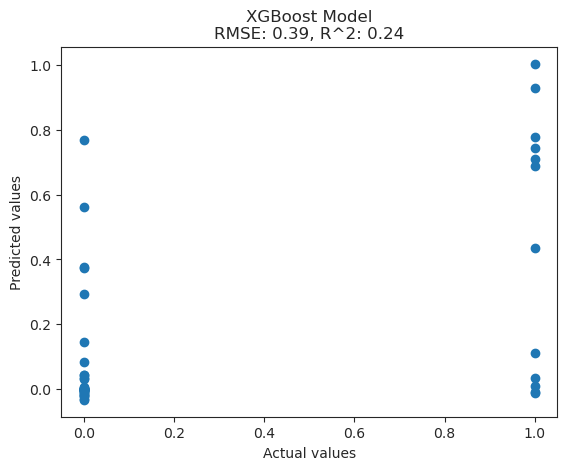

In [24]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.39, random_state=40)

# Train the XGBoost model
sb_model = XGBRegressor()
sb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = sb_model.predict(X_test)

# Calculate the evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = sb_model.score(X_test, y_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"XGBoost Model\nRMSE: {rmse:.2f}, R^2: {r2:.2f}")

